## Import librarires

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns


In [11]:
data = pd.read_csv("./dataset.csv")
data.head()

Check whether the dataset has any null values or not. For our data, it does not contain any null values.

In [13]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Check the type of transactions mentioned in our dataset.

In [14]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Visualize the transaction types.

In [15]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(data, values=quantity, names=transactions,
                hole=0.5, title="Distribution of Transaction Types")
figure.show()


Check the correlation between the features of the data with the **isFraud** column

In [16]:
# Checking correlation
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

<AxesSubplot:>

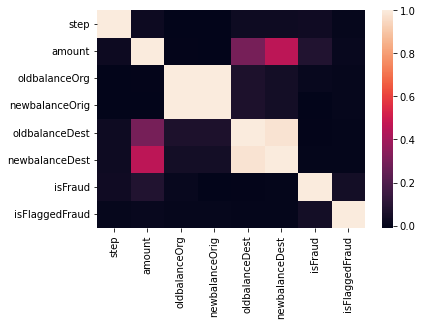

In [17]:
sns.heatmap(correlation)


Transform the categorical features into numerical as well as the values of the **isFraud** column into *No Fraud* and *Fraud* labels to better evaluate the output.

In [18]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


## Online Payments Fraud Detection Model

### Model Training
Training a classification model to classify fraud and non fraud transactions.

In [19]:
# splitting the data into training & test sets
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [20]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997296711103287


Classifying whether a transaction is a fraud or not by feeding a transaction into the model.

In [26]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0], [3,364231.82,5549291.55,2930403.37], [5,251111.82,5498989.55,10000000.0]])
print(model.predict(features))

['Fraud' 'No Fraud' 'No Fraud']
